# Setup

In [1]:
%config InlineBackend.figure_format = "retina"
import random

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### 2E1

Which of the following expressions correspond to the statement: _the probability of rain on Monday_?


    1) Pr(rain)
    2) Pr(rain|monday)
    3) Pr(Monday|rain)
    4) Pr(rain, Monday) / Pr(Monday)
    
    
   **Answer**: 2 and 4. Both are mathematically equivalent.

#### 2E2

Which of the following statements correspond to the expression: Pr(Monday|rain)?


    1) The probability of rain on Monday.
    2) The probability of rain, given that it's Monday.
    3) The probability that it is Monday, given that it is raining.
    4) The probability that it is Monday and that it is raining.


**Answer**: 3

#### 2E3

Which of the expressions below correspond to the statement: _the probability that it is Monday, given that it is raining_?


    1) Pr(Monday|rain)
    2) Pr(rain|monday)
    3) Pr(rain|monday) Pr(Monday)
    4) Pr(rain|monday) Pr(Monday) / Pr(rain)
    5) Pr(Monday|rain) Pr(rain) / Pr(Monday)
 

**Answer**: 1 and 4. By the definition of conditional probability both are mathematically equivalent.

#### 2M1

Recall the globe tossin model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following observations. In each case, assume a uniform prior for _p_.

**Answer**

Let's first construct the grid on which we will evaluate our distribution

In [2]:
p_grid = np.linspace(0, 1, num=20)      # Grid with 20 points
fine_grid = np.linspace(0, 1, num=1000) # for comparing vs the exact solution

Denote by $n$ the number of trials and $k$ the number of `W` values. We solve all 3 cases with the same approach

In [3]:
def posterior_on_grid(k, n, grid):
    prior = np.ones_like(grid)
    likelihood = st.binom.pmf(k, n, grid)
    unormalized_posterior = likelihood * prior
    z = get_normalization_factor(unormalized_posterior, grid)
    return unormalized_posterior / z

def get_normalization_factor(unstd_posterior, grid):
    heights = (unstd_posterior[:-1] + unstd_posterior[1:]) / 2
    bases = np.diff(grid)
    areas = (bases * heights)
    return areas.sum()

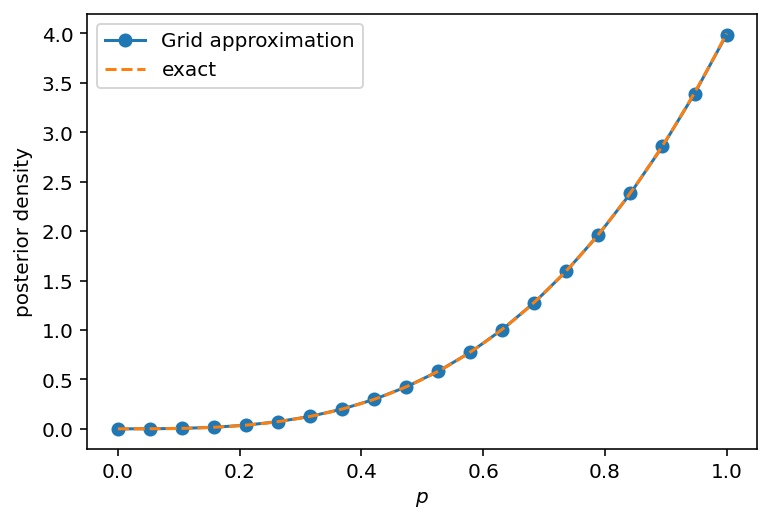

In [4]:
# 1) W, W, W 
k = 3
n = 3
result = posterior_on_grid(k, n, p_grid)
plt.plot(p_grid, result, marker="o", label="Grid approximation")
plt.plot(
    fine_grid,
    st.beta(k + 1, (n - k) + 1).pdf(fine_grid),
    label="exact",
    linestyle="--"
)
plt.xlabel("$p$")
plt.ylabel("posterior density")
plt.legend()
plt.show()

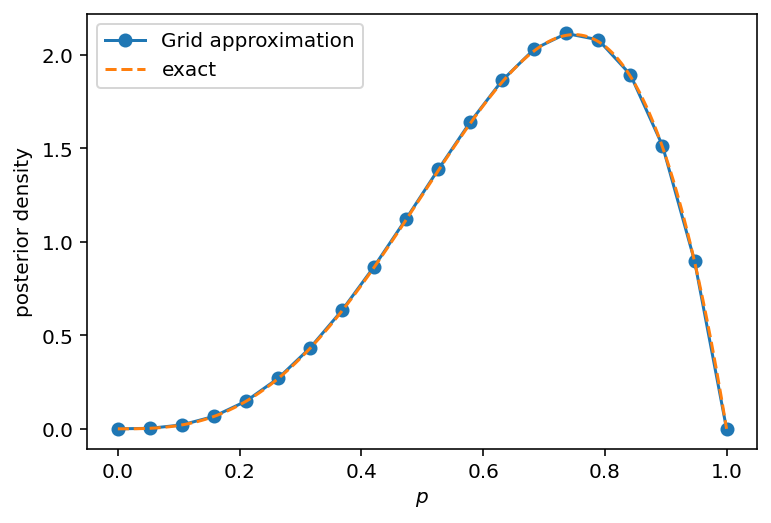

In [5]:
# 2) W, W, W, L
k = 3
n = 4
result = posterior_on_grid(k, n, p_grid)
plt.plot(p_grid, result, marker="o", label="Grid approximation")
plt.plot(fine_grid, st.beta(k + 1, (n - k) + 1).pdf(fine_grid), label="exact", linestyle="--")
plt.xlabel("$p$")
plt.ylabel("posterior density")
plt.legend()
plt.show()

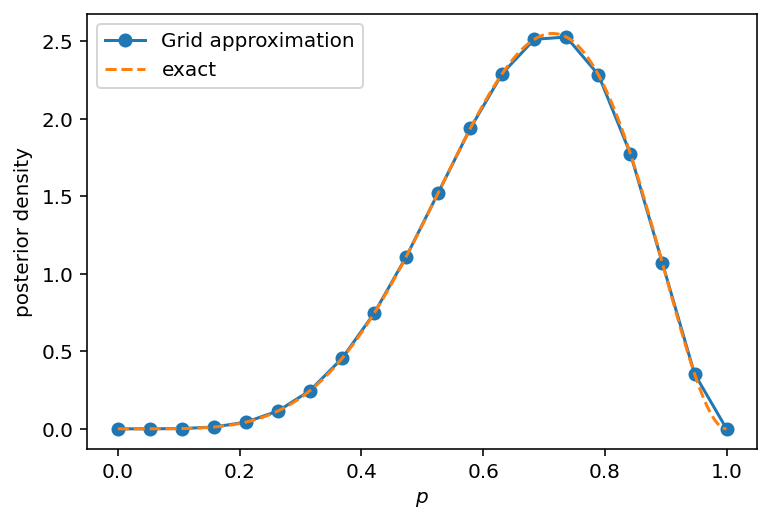

In [6]:
# 3) L, W, W, L, W, W, W
k = 5
n = 7
result = posterior_on_grid(k, n, p_grid)
plt.plot(p_grid, result, marker="o", label="Grid approximation")
plt.plot(fine_grid, st.beta(k + 1, (n - k) + 1).pdf(fine_grid), label="exact", linestyle="--")
plt.xlabel("$p$")
plt.ylabel("posterior density")
plt.legend()
plt.show()

**Note**. In the Rethinking book, the normalization method used in the grid approximation is, in my view, incorrect. In particular, the book suggests normalizing the posterior density by the _sum_ of the values of the unormalized posterior. Given that the $p$ parameter of the binomial distribution is a continuous parameter, the correct normalization factor should be the total _area_ under the unormalized posterior.
I chose to approximate the area using rectangles and it's the reason for my function ``get_normalization_factor``.

#### 2M2
Now assume a prior for $p$ that is equal to zero when $p < 0.5$ and is a positive constant when $p \geq 0.5$. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

In [7]:
def posterior_on_grid_v2(k, n, grid):
    prior = np.where(grid >= 0.5, 2, 0)
    likelihood = st.binom.pmf(k, n, grid)
    unormalized_posterior = likelihood * prior
    z = get_normalization_factor(unormalized_posterior, grid)
    return unormalized_posterior / z

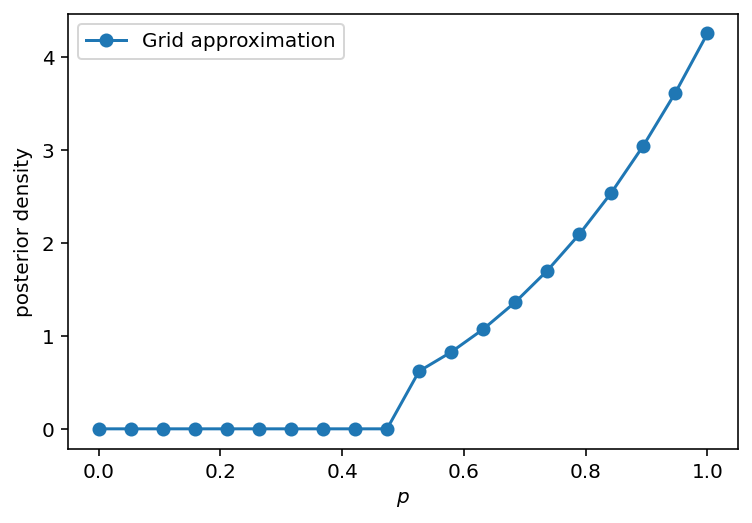

In [8]:
# 1) W, W, W 
k = 3
n = 3
result = posterior_on_grid_v2(k, n, p_grid)
plt.plot(p_grid, result, marker="o", label="Grid approximation")
plt.xlabel("$p$")
plt.ylabel("posterior density")
plt.legend()
plt.show()

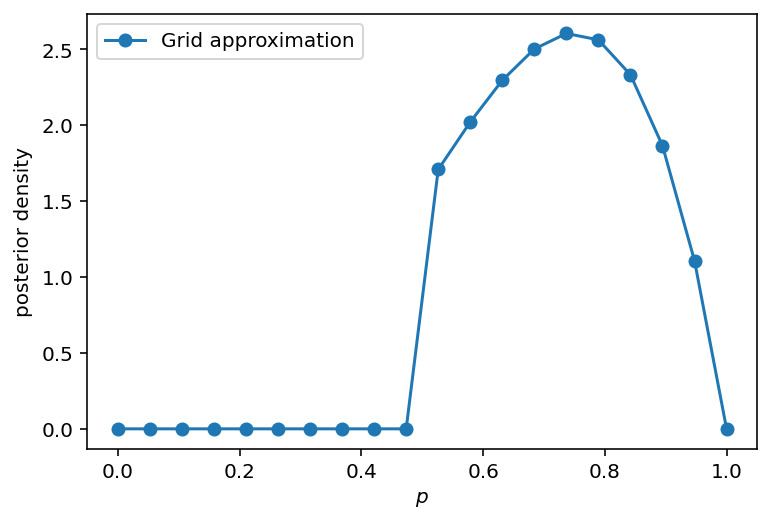

In [9]:
# 2) W, W, W, L
k = 3
n = 4
result = posterior_on_grid_v2(k, n, p_grid)
plt.plot(p_grid, result, marker="o", label="Grid approximation")
plt.xlabel("$p$")
plt.ylabel("posterior density")
plt.legend()
plt.show()

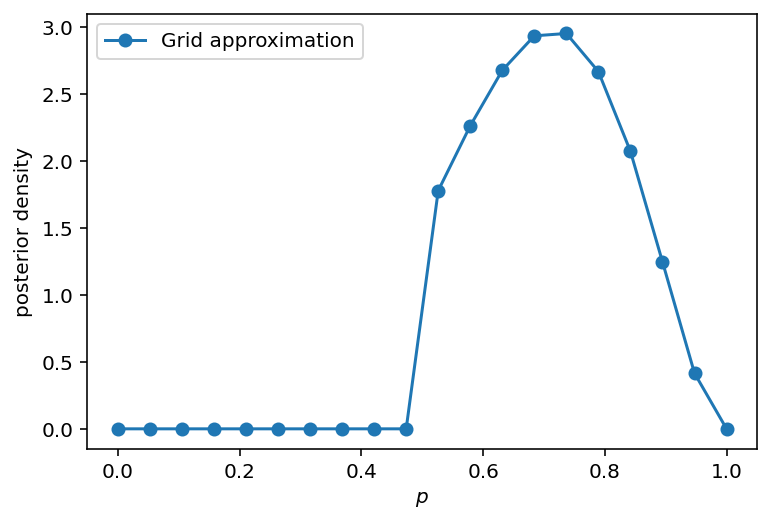

In [10]:
# 3) L, W, W, L, W, W, W
k = 5
n = 7
result = posterior_on_grid_v2(k, n, p_grid)
plt.plot(p_grid, result, marker="o", label="Grid approximation")
plt.xlabel("$p$")
plt.ylabel("posterior density")
plt.legend()
plt.show()

#### 2M3

Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100 land. Further suppose that one of these globes - you don't know which - was tossed in the air and produced a "land" observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing "land" ($Pr( Earth\vert land)$ ), is 0.23.

**Answer**

Use Baye's theorem and total probability:

\begin{align}
P(\mathrm{Earth} \vert \mathrm{land}) &= P(\mathrm{land} \vert \mathrm{Earth}) P(\mathrm{Earth}) / P(\mathrm{land}) \\
P(\mathrm{land}) &= P(\mathrm{land} \vert \mathrm{Earth}) P(\mathrm{Earth}) + P(\mathrm{land} \vert \mathrm{Mars}) P(\mathrm{Mars})
\end{align}

Then plug in the values:
\begin{align}
P(\mathrm{Earth}) = P(\mathrm{Mars}) &= 0.5 \\
P(\mathrm{land}\vert\mathrm{Mars}) &= 1 \\
P(\mathrm{land}\vert\mathrm{Earth}) &= 0.7
\end{align}

Then
\begin{align}
P(\mathrm{land}) &= 0.7\times 0.5 + 1\times0.5 = 0.85 \\
P(\mathrm{Earth} \vert \mathrm{land}) &= 0.35 / 0.85 \approx 0.41
\end{align}


#### 2M4
Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don’t know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table).

**Answer**

There is a card on the table. The side facing up is black. Let's label the possible 'conjectures'.

| Card | Ways to produce B-up | Prior counts | Count |
| ---  | -------------------- | ------------ | ----- |
| BB   | 2 | 1 | 2 |
| BW   | 1 | 1 | 1 |
| WW   | 0 | 1 | 0 |

From these counts we see that the probability that the card on the table is the 'BB' card (and hence a black side facing down) is 2/3.

#### 2M5
Now suppose there are four cards: $B / B, B / W, W / W$, and another $B / B$. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

**Answer**

We approach it like the previous problem, but this time 
a BB card can happen in 2 ways so we update its prior count:


| Card | Ways to produce B-up | Prior counts | Count |
| ---  | -------------------- | ------------ | ----- |
| BB   | 2 | 2 | 4 |
| BW   | 1 | 1 | 1 |
| WW   | 0 | 1 | 0 |

From these counts we see that the probability that the card on the table is a 'BB' card (and hence a black side facing down) is 4/5.

#### 2M6
Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it's less likely that a card with black sides is pulled from the bag. So again assume there are three cards: $B / B, B / W$, and $W/W$. After experimenting a number of times, you conclude that for every way to pull the $\mathrm{B} / \mathrm{B}$ card from the bag, there are 2 ways to pull the $\mathrm{B} / \mathrm{W}$ card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method, as before.

**Answer**

We approach it like the previous problem, but we update the prior counts taking as a reference the frequency of the BB card.


| Card | Ways to produce B-up | Prior counts | Count |
| ---  | -------------------- | ------------ | ----- |
| BB   | 2 | 1 | 2 |
| BW   | 1 | 2 | 2 |
| WW   | 0 | 3 | 0 |

From these counts we see that the probability that the card on the table is a 'BB' card (and hence a black side facing down) is 2/4 = 0.5

#### 2M7
Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now $0.75$. Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

**Answer**

Consider the possible scenarios:

1. The first card is a BB card. Then we have the followin counts for the second card:

| 2nd Card | Ways to produce W-up | Prior counts | Count |
| ---  | -------------------- | ------------ | ----- |
| BW   | 1 | 1 | 1 |
| WW   | 2 | 1 | 2 |

We could understand this as seeing that drawing the BB card first, results in 3 ways of producing a W side up in the second card.

2. The first card is a BW card. Then for the second card

| 2nd Card | Ways to produce W-up | Prior counts | Count |
| ---  | -------------------- | ------------ | ----- |
| BB   | 0 | 1 | 0 |
| WW   | 2 | 1 | 2 |

We could understand this as seeing that drawing the BW card first, results in 2 ways of producing a W side up in the second card.


3. The first card is a WW card. This scenario is ruled out since the first card showed a black side up.

From our answer to problem `2M4` we had stablished that the BB card had 2 ways of producing a B side up and the BW card had 1 way of producing a B side up. These counts play the role of our prior now, so we have

| 1st card | Ways to produce W-up in 2nd card | Prior counts | Count |
| ---  | -------------------- | ------------ | ----- |
| BB   | 3 | 2 | 6 |
| BW   | 2 | 1 | 2 |
| WW   | - | 0 | 0 |

From these counts we see that the probability that the first card on the table is the 'BB' card (and hence a black side facing down) is 6/8 = 0.75.

#### 2H1
Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins $10 \%$ of the time, otherwise birthing a single infant. Species B births twins $20 \%$ of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

**Answer**

Let's stablish some notation. I'll denote the event _"the female panda is of species A"_ as $F_A$. And I'll use $F_B$ for the equivalent statement for species B. I'll denote $T_1$ the event that the first birth were twins. I'll denote $T_2$ the event that the second birth are twins.

The problem is asking is to compute $P(T_2 \vert T_1)$.

\begin{align}
P(T_2 \vert T_1) = P(T_2, F_A \vert T_1) + P(T_2, F_B \vert T_1)
\end{align}

Since the probability of giving birth to twins is fully determined by the species of the panda we can write the above as

\begin{align}
P(T_2 \vert T_1) &= P(T_2, \vert F_A) P(F_A \vert T_1) + P(T_2, \vert F_B) P(F_B \vert T_1) \\
 &= 0.10 \times P(F_A \vert T_1) + 0.20 \times P(F_B \vert T_1)
\end{align}

So we need the posterior distribution $P(F_A\vert T_1)$. 

\begin{align}
P(F_A\vert T_1) &= \frac{P(T_1\vert F_A) P(F_A)}{P(T_1)} \\
&= \frac{P(T_1\vert F_A) P(F_A)}{P(T_1\vert F_A) P(F_A) + P(T_1\vert F_B) P(F_B)} \\
&=\frac{0.1 \times 0.5}{0.1 \times 0.5 + 0.2 \times 0.5}\\
&=1/3
\end{align}

And therefore $P(F_B\vert T_1) = 2/3$. 

In the calculation above, I've used the fact that the prior probability of each species is 0.5 since the problem specifies that both species are equally common. Putting all together we have

\begin{align}
P(T_2 \vert T_1) &= 0.10 \times 1/3 + 0.20 \times 2/3 = 1/6
\end{align}

#### 2H2
Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

**Answer**

We've already computed it in the previous solution. This is $P(F_A\vert T_1) = 1/3$.

#### 2H3
Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

**Answer**

We simply use "Bayesian updating" on the answer to problem `2H2`. We now need $P(F_A\vert \tilde{T_2}, T_1)$. I'm using $\tilde{T}$ to denote the event 'singleton birth'.

\begin{align}
P(F_A\vert \tilde{T_2}, T_1) &= \frac{P(\tilde{T}_2 \vert F_A, T_1) P(F_A\vert T_1)}{P(\tilde{T}_2\vert T_1)}\\
&= \frac{P(\tilde{T}_2 \vert F_A) P(F_A\vert T_1)}{P(\tilde{T}_2\vert T_1)}\quad \text{By conditional independence}\\
&= \frac{0.9 \times 1/3}{5/6} \approx 36\%
\end{align}

I find this result very interesting. Having a twin is evidence that favours species B, and not having a twin is evidence that favours species A. But they do not have the same 'weight'. 

Let's write a quick simulation loop to verify this answer.

In [13]:
num_sims = 100_000
twin_probas = {"A": 0.1, "B": 0.2}
panda_samples = []
birth_samples = []
for _ in range(num_sims):
    panda = random.choice("AB")
    twin_proba = twin_probas[panda]
    birth_sequence = random.choices(
        "TS",
        weights=[twin_proba, 1 - twin_proba],
        k=2
    )
    panda_samples.append(panda)
    birth_samples.append("".join(birth_sequence))

In [14]:
n = sum(seq == "TS" for seq in birth_samples)
k = sum(
    panda == "A"
    for panda, seq
    in zip(panda_samples, birth_samples)
    if seq == "TS"
)
round(k / n, 2)

0.36

#### 2H4
A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of the data, even if the data are of different types.

So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This is the informa- tion you have 
about the test:

* The probability it correctly identifies a species A panda is 0.8.
* The probability it correctly identifies a species B panda is 0.65.
    
The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation, now using the birth data as well.

**Answer**

Let's first do the calculation ignoring the birhts:

\begin{align}
P\left(F_{A} \mid \text {test}=A\right)=& \frac{P\left(\text {test}=A \mid F_{A}\right) P\left(F_{A}\right)}{P\left(\text{test}=A\right)} \\
 =& \frac{P\left(\text {test}=A \mid F_{A}\right) P\left(F_{A}\right)}{P\left(\text{test}=A \mid F_{A}\right) P\left(F_{A}\right) + P\left(\text{test}=A \mid F_{B}\right) P\left(F_{B}\right)} \\
 =& \frac{0.8 \times 0.5}{0.8 \times 0.5 + 0.35\times 0.5} \approx 70\%
\end{align}

Now suppose that we also observe the sequence of births `TS` (twins, then single). We simply replace our priors in the previous calculation using the result obtained in problem `2H3`:

\begin{align}
P\left(F_{A} \mid \text {test}=A, T_1, \tilde{T}_2 \right) = & \frac{0.8 \times 0.36}{0.8 \times 0.36 + 0.35\times 0.64} \approx 56\%
\end{align}

Again, let us run a simulation just to be sure.

In [15]:
num_sims = 100_000
twin_probas = {"A": 0.1, "B": 0.2}
test_A_probas = {"A": 0.8, "B": 0.35}
panda_samples = []
birth_samples = []
tests_samples = []
for _ in range(num_sims):
    panda = random.choice("AB")
    twin_proba = twin_probas[panda]
    birth_sequence = random.choices(
        "TS",
        weights=[twin_proba, 1 - twin_proba],
        k=2
    )
    test_p = test_A_probas[panda]
    test_result, = random.choices(
        "AB",
        weights=[test_p, 1 - test_p]
    )
    panda_samples.append(panda)
    birth_samples.append("".join(birth_sequence))
    tests_samples.append(test_result)

In [16]:
n = sum(
    seq == "TS" and test == "A"
    for seq, test
    in zip(birth_samples, tests_samples)
)
k = sum(
    panda == "A"
    for panda, seq, test
    in zip(panda_samples, birth_samples, tests_samples)
    if seq == "TS" and test == "A"
)
round(k / n, 2)

0.57